In [1]:
from feos.dft import *
from feos.pcsaft import PcSaftParameters

import si_units as si
import matplotlib.pyplot as plt
import numpy as np

In [2]:
params = PcSaftParameters.from_json(["methanol"], "../../parameters/pcsaft/rehner2020.json")
func = HelmholtzEnergyFunctional.pcsaft(params)
T = 350*si.KELVIN
state = State(func, T, pressure=si.BAR)
potential = ExternalPotential.LJ93(3.0, 100.0, 0.08)
#potential = ExternalPotential.Steele(3.0, 100.0, 0.08)

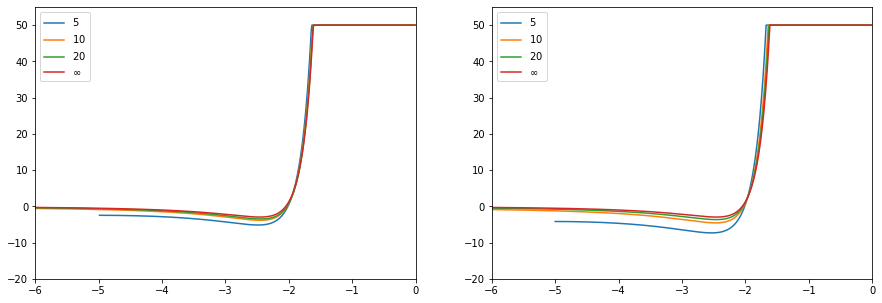

In [3]:
f, ax = plt.subplots(1,2,figsize=(15,5))

pore_sizes = [5,10,20]
slit_pore = Pore1D(Geometry.Cartesian, 100*si.ANGSTROM, potential, 4096).initialize(state)
cylindrical_pores = [Pore1D(Geometry.Cylindrical, r*si.ANGSTROM, potential).initialize(state) for r in pore_sizes]
spherical_pores = [Pore1D(Geometry.Spherical, r*si.ANGSTROM, potential).initialize(state) for r in pore_sizes]

for cpore, spore, size in zip(cylindrical_pores, spherical_pores, pore_sizes):
    ax[0].plot(cpore.r/si.ANGSTROM - size, cpore.external_potential.T, label=f'${size}$')
    ax[1].plot(spore.r/si.ANGSTROM - size, spore.external_potential.T, label=f'${size}$')
for a in ax:
    a.plot(slit_pore.z/si.ANGSTROM-50, slit_pore.external_potential.T, label='$\infty$')
    a.axis([-6,0,-20,55])
    a.legend()

In [4]:
pmin = 0.2*si.BAR
pmax = 2.5*si.BAR
cyl10 = Adsorption1D.equilibrium_isotherm(func, T, si.linspace(pmin, pmax, 151), Pore1D(Geometry.Cylindrical, 10*si.ANGSTROM, potential))
cyl20 = Adsorption1D.equilibrium_isotherm(func, T, si.linspace(pmin, pmax, 151), Pore1D(Geometry.Cylindrical, 20*si.ANGSTROM, potential))
#sph10 = Adsorption1D.equilibrium_isotherm(func, T, si.linspace(pmin, pmax, 151), Pore1D(Geometry.Spherical, 10*si.ANGSTROM, potential))
sph20 = Adsorption1D.equilibrium_isotherm(func, T, si.linspace(pmin, pmax, 151), Pore1D(Geometry.Spherical, 20*si.ANGSTROM, potential))
car10 = Adsorption1D.equilibrium_isotherm(func, T, si.linspace(pmin, pmax, 151), Pore1D(Geometry.Cartesian, 20*si.ANGSTROM, potential))
car20 = Adsorption1D.equilibrium_isotherm(func, T, si.linspace(pmin, pmax, 151), Pore1D(Geometry.Cartesian, 40*si.ANGSTROM, potential))

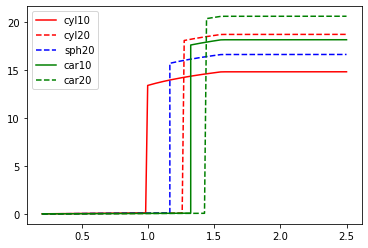

In [5]:
plt.plot(cyl10.pressure/si.BAR, cyl10.total_adsorption/(np.pi*100*si.ANGSTROM**3)/(si.KILO*si.MOL/si.METER**3), 'r', label='cyl10')
plt.plot(cyl20.pressure/si.BAR, cyl20.total_adsorption/(np.pi*400*si.ANGSTROM**3)/(si.KILO*si.MOL/si.METER**3), 'r--', label='cyl20')
#plt.plot(sph10.pressure/si.BAR, sph10.total_adsorption/(4/3*np.pi*1000*si.ANGSTROM**3)/(si.KILO*si.MOL/si.METER**3), 'b', label='sph10')
plt.plot(sph20.pressure/si.BAR, sph20.total_adsorption/(4/3*np.pi*8000*si.ANGSTROM**3)/(si.KILO*si.MOL/si.METER**3), 'b--', label='sph20')
plt.plot(car10.pressure/si.BAR, car10.total_adsorption/(10*si.ANGSTROM**3)/(si.KILO*si.MOL/si.METER**3), 'g', label='car10')
plt.plot(car20.pressure/si.BAR, car20.total_adsorption/(20*si.ANGSTROM**3)/(si.KILO*si.MOL/si.METER**3), 'g--', label='car20')
plt.legend()

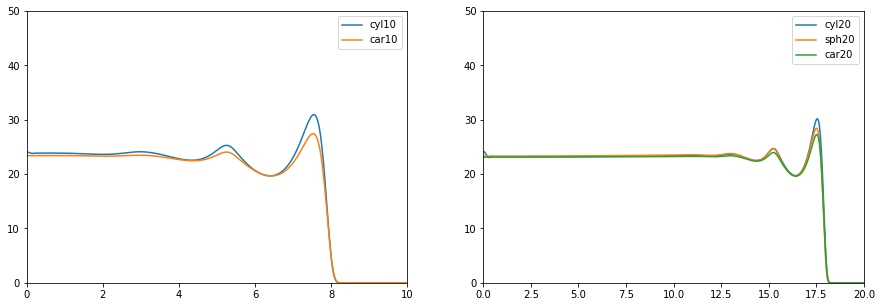

In [6]:
f, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(cyl10.profiles[-1].r/si.ANGSTROM, (cyl10.profiles[-1].density/(si.KILO*si.MOL/si.METER**3)).T, label='cyl10')
ax[1].plot(cyl20.profiles[-1].r/si.ANGSTROM, (cyl20.profiles[-1].density/(si.KILO*si.MOL/si.METER**3)).T, label='cyl20')
#ax[0].plot(sph10.profiles[-1].r/si.ANGSTROM, (sph10.profiles[-1].density/(si.KILO*si.MOL/si.METER**3)).T, label='sph10')
ax[1].plot(sph20.profiles[-1].r/si.ANGSTROM, (sph20.profiles[-1].density/(si.KILO*si.MOL/si.METER**3)).T, label='sph20')
ax[0].plot(car10.profiles[-1].r/si.ANGSTROM, (car10.profiles[-1].density/(si.KILO*si.MOL/si.METER**3)).T, label='car10')
ax[1].plot(car20.profiles[-1].r/si.ANGSTROM, (car20.profiles[-1].density/(si.KILO*si.MOL/si.METER**3)).T, label='car20')

ax[0].set_xlim(0,10)
ax[1].set_xlim(0,20)
for a in ax:
    a.set_ylim(0,50)
    a.legend()